# 计算机视觉模型介绍

## 常用架构

输入维度与常用 CNN 架构

CNN 模型	|输入维度格式	|输入维度示例
---|---|---
LeNet (MNIST)	|(1, 28, 28)	|灰度图像
AlexNet	|(3, 227, 227)	|RGB 图像
VGG16	|(3, 224, 224)	|RGB 图像
ResNet50	|(3, 224, 224)	|RGB 图像
MobileNet	|(3, 224, 224)	|RGB 图像
UNet (分割任务)	|(3, 512, 512)	|图像分割

## 卷积神经网络（CNN）

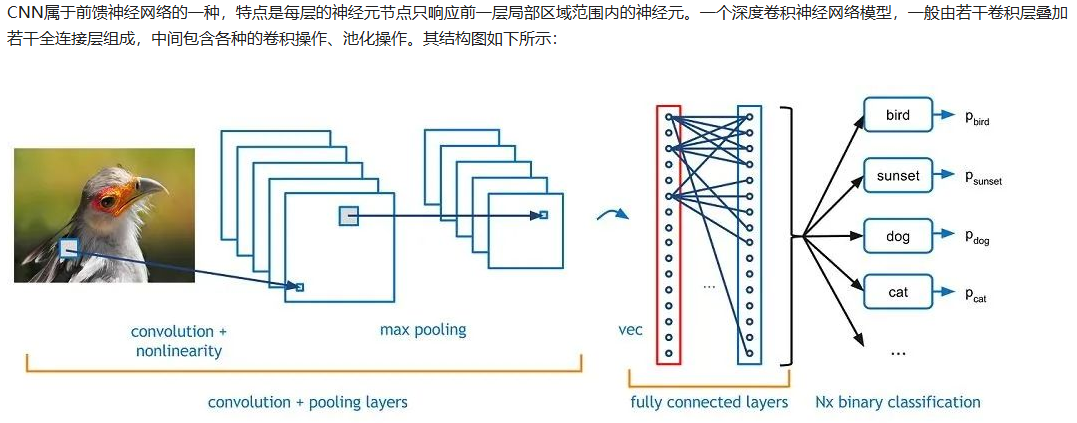

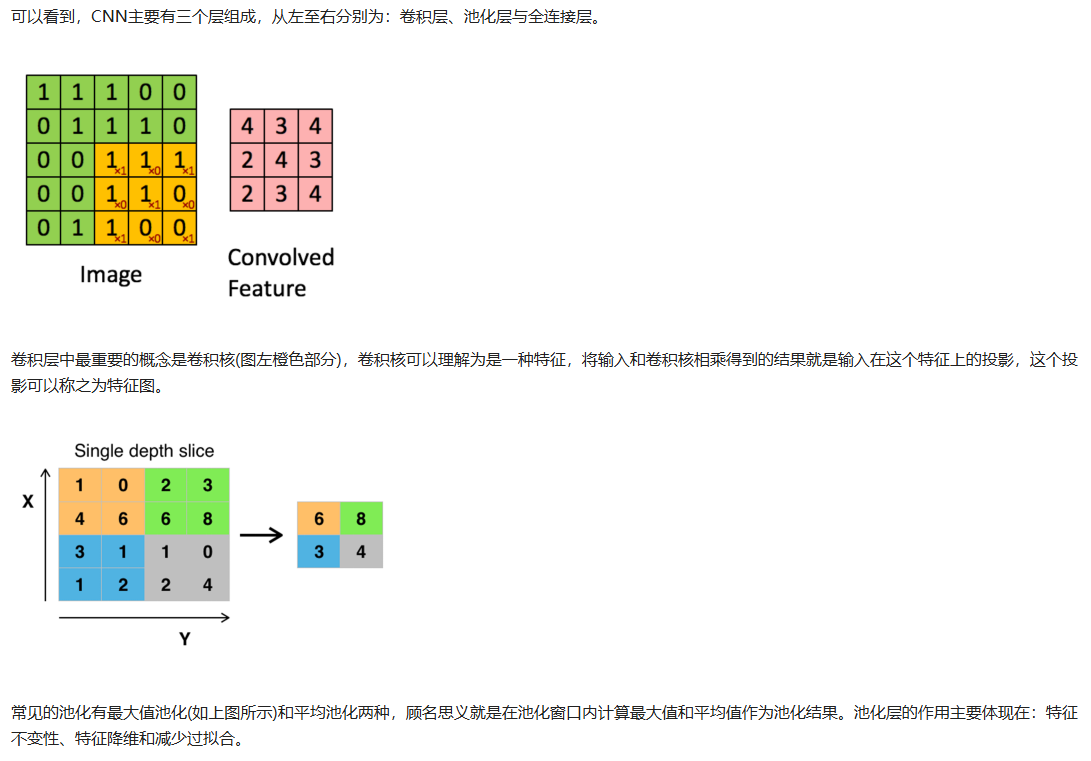

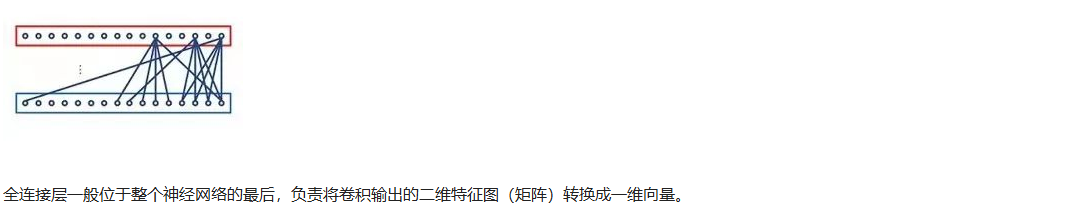

卷积神经网络（convolutional neural network, CNN）是一种专门用来处理具有类似网格结构的数据的神经网络。 
- 卷积神经网络中一个典型层包含三级。在第一级中，这一层并行的计算多个卷积产生一组线性激活响应，即$w*x+b$（仿射变换）。在第二级中，每个线性激活响应将会通过一个非线性的激活函数（activate function）。在第三级中，使用池化函数（pooling function）来进一步调整这一层的输出。
- 卷积的运算通常用星号表示：$(x*w)(t)$。卷积的第一个参数通常叫做**输入**，即f；第二个参数叫做**核函数(卷积核)**,即w；输出有时被称为**特征映射**。
- 卷积的意义：输入和核函数的加权叠加（标量积）。
- 池化函数使用某一位置的相邻输出的总体特征来代替网络在该位置的输出（最大池化、平均池化等）。
- 当输入做出少量平移时，池化能够帮助输入的表示近似不变。**平移不变性**是指当我们对输入进行少量平移（卷积过程）时，经过池化函数后的大多数输出并不会发生变化。
- 经过卷积神经网络训练后，我们得到以下特征：1、邻域的局部操作（平移）；2、平移不变性；3、模型的参数大幅减少。

卷积神经网络的工作是估计连续层中的一组滤波器的卷积核，这些滤波器将把一个多通道图像转换成另一个多通道图像，其中不同的通道对应不同的特征，例如一个通道代表平均值，一个通道代表垂直边缘。

密集连接层和卷积层的根本区别在于，Dense层从输入特征空间中学到的是全局模式，而卷积层学到的是局部模式。对于包含两个空间轴（高度和宽度）和一个深度轴（也叫通道轴）的3D张量，其卷积也叫**特征图**。卷积运算从输入特征图中提取图块，并对所有这些图块运用相同的变换，生成**输出特征图**，该输出特征图仍是一个3D张量，具有深度和高度，但深度轴不是代表特定颜色，而是代表**过滤器**，过滤器对输入数据的某一方面进行编码。比如一张脸，每个过滤器就可以代表脸的一个特征，耳朵、眼睛等。

卷积由两个关键参数所定义：**从输入中提取的图块尺寸（窗口）**，这些图块通常是3×3或5×5；**输出特征图的深度**，卷积所计算的过滤器的数量。  
卷积工作原理：在3D特征图上滑动窗口提取3D图块，然后每个3D图块与学到的同一个权重矩阵（**卷积核**）做张量积，转换成1D张量，最后对这些向量进行空间重组使其转换为形状为3D的输出特征图。

输出的宽度和高度可能与输入的宽度和高度不同，不同的原因可能是：
- 边界效应，一般情况下，当使用奇数卷积核时，输出比输入每个维度都少2个像素；使用偶数卷积核时，情况较为复杂，因此为了保证输出和输入维度相同，默认选择奇数卷积核。
- 使用了步幅，默认步幅是1，实践中很少用。

为了对特征图进行下采样，使用**最大池化**，最大池化是从输入特征图中提取窗口，并输出每个通道的最大值，最大池化通常使用2×2的窗口和步幅2，其目的是将特征图下采样2倍。卷积通常使用3×3窗口和步幅1。使用下采样的原因是减少需要处理的特征图的元素个数。